# SCC Finding (Kosaraju-Sharir Algorithm)

Here, we will implement the SCC finding algorithm in DPV, more commonly known as the Kosaraju-Sharir algorithm.

In [1]:
import base64
import networkx as nx
import typing
import numpy as np
ok = base64.b85decode(b'AmWyU;+BBomVn}xgyNQf;+BBomVn}xgdiZ|mW1M#fZ~>b;+BZwmV_W6AmWyU;+BBomVn}xfZ~>b;+BLUAmWyU;+BBomVn}xfZ~>b;+BLU3gVWCARr*(mWUuAAmWyYAmWygAmWyU;+B9Q;+BBomV_YUmWUwYmWUuAAmWygAmWyYAmWyYARr*(mXII{;+BvgAmWyY;+BBomVn}xfZ~>bARr(h;+BZwmW1M#gyNQj;+BXYARr*(mVn}xgdiXwARr*(mVn}xgdiXw3LqdL;+BXYARr(hARywFgyNQfARr*(mWUwYmVn}xgdiXw;+BXYAmWyQ;+BLUARywFh#(*eAmWyU;+B9QARr(hARywFh#(*!;+BNsmVh82AmWyY;+BBomVn}xfFK|sAmWyY;+BBomVn}xfFK|s3gVWCARr(hARr(hAmWygARr*(mXIJIARywFkRTu+ARr(h;+BvgARr(hAPVA^kRTu+ARr(hARr(hARr(hARr(hARr(hARr(hARr(hARr0~').decode()

Below is a Graph with iconic SCC generator. It generates 4 possibly strongly connected components ABCD, then add edge AB, AC and BD, CD.

In [2]:
try:
    nx.gnp_random_graph(7, 0.65, seed=np.random.default_rng(seed=1145141919), directed=True)
    prng = np.random.default_rng(seed=114514)
except Exception as e:
    prng = np.random.RandomState(seed=1919810)

In [3]:
def random_scc_graph():
    sizes = [np.random.randint(6, 20) for _ in range(4)]
    random_graph1 = nx.gnp_random_graph(sizes[0], 0.65, seed=prng, directed=True)
    
    random_graph2 = nx.gnp_random_graph(sizes[1], 0.65, seed=prng, directed=True)
    nx.relabel_nodes(random_graph2, {i:i + sizes[0] for i in range(sizes[1])}, copy=False)
    
    random_graph3 = nx.gnp_random_graph(sizes[2], 0.65, seed=prng, directed=True)
    nx.relabel_nodes(random_graph3, {i:i + sizes[0] + sizes[1] for i in range(sizes[2])}, copy=False)
    
    random_graph4 = nx.gnp_random_graph(sizes[3], 0.65, seed=prng, directed=True)
    nx.relabel_nodes(random_graph4, {i:i + sizes[0] + sizes[1] + sizes[2] for i in range(sizes[3])}, copy=False)
    
    random_graph = nx.compose(nx.compose(nx.compose(random_graph1, random_graph2), random_graph3), random_graph4)
    random_graph.add_edge(np.random.randint(0, sizes[0]), np.random.randint(sizes[0], sizes[0] + sizes[1]))
    random_graph.add_edge(np.random.randint(0, sizes[0]), np.random.randint(sizes[0] + sizes[1], sizes[0] + sizes[1] + sizes[2]))
    random_graph.add_edge(np.random.randint(sizes[0], sizes[0] + sizes[1]), np.random.randint(sizes[0] + sizes[1] + sizes[2], sizes[0] + sizes[1] + sizes[2] + sizes[3]))
    random_graph.add_edge(np.random.randint(sizes[0] + sizes[1], sizes[0] + sizes[1] + sizes[2]), np.random.randint(sizes[0] + sizes[1] + sizes[2], sizes[0] + sizes[1] + sizes[2] + sizes[3]))
    return random_graph

[13, 6, 8, 13]


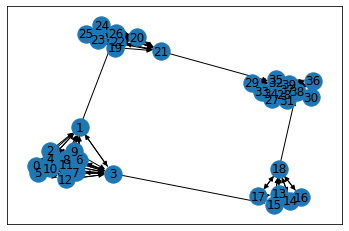

In [4]:
random_graph = random_scc_graph()
nx.draw_networkx(random_graph)
print([len(c) for c in nx.strongly_connected_components(random_graph)])

## Utilities
### Graph Reversal
One of the most iconic component in Kosajaru algorithm is graph reversal. Write a function that, given a list of edges, reverse the graph.

In [9]:
def reverse_graph(g: typing.Set[typing.Tuple[int, int]]) -> typing.Set[typing.Tuple[int, int]]:
    # Your code here
    res = set(())
    for edge in g:
        res.add((edge[1], edge[0]))
    return res

In [127]:
for _ in range(50):
    random_graph = nx.gnp_random_graph(50, 0.6, seed=1145141919, directed=True)
    gre0 = reverse_graph(set(random_graph.edges))
    gre1 = set(random_graph.reverse().edges)
    assert gre0 == gre1
print(ok)

 ▄▀▀▄▀▀▀▄  ▄▀▀█▄   ▄▀▀▀▀▄  ▄▀▀▀▀▄ 
█   █   █ ▐ ▄▀ ▀▄ █ █   ▐ █ █   ▐ 
▐  █▀▀▀▀    █▄▄▄█    ▀▄      ▀▄   
   █       ▄▀   █ ▀▄   █  ▀▄   █  
 ▄▀       █   ▄▀   █▀▀▀    █▀▀▀   
█         ▐   ▐    ▐       ▐      
▐                                 




Like what Prof. Hilfinger's CS61B did, as you implemented this function you are then free to use implementations in `networkx`: instead of using `reverse_graph`, you can also use [`nx.DiGraph.reverse`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.reverse.html?highlight=reverse#digraph-reverse) (click for documentation).

### DFS
Another utility you will need is hyped up DFS: you will need one that records `post` number when traversing the graph, and a separate `explore(v)` function that traverses a sink SCC.  

You might want to define a helper function in `dfs()`, and use `nonlocal` to modify variables in `dfs()`'s scope.

In [238]:
def reverse_graph_dict(g: typing.Dict[int, list]) -> typing.Dict[int, list]:
    dict_res = {}
    g_set = set([(u, v) for u in g.keys() for v in g[u]])
    g_set_reverse = reverse_graph(g_set)
    
    for v in g.keys():
        dict_res[v] = []
    for v, u in g_set_reverse:
        dict_res[v].append(u)
    
    return dict_res

# Given a graph G and a vertex v, return all vertices reachable from v
# Return: a set of integers that contains all vertices reachable from v
def explore(g, v) -> typing.Set[int]:
    # Your code here
    visited = {v : False for v in g.keys()}
    visited_reverse = {v : False for v in g.keys()}
    g_reverse = reverse_graph_dict(g)

    def explore(v, visited, g):
        visited[v] = True
        res = {v}

        for node in g[v]:
            if visited[node] == False:
                res = res.union(explore(node, visited, g))

        return res
    
    res = explore(v, visited, g)
    res_reverse = explore(v, visited_reverse, g_reverse)
    return res.intersection(res_reverse)

    

# Given a graph, do DFS and return a tuple with all vertices as key and their post number as value
def dfs(g) -> typing.Dict[int, int]:
    # Your code here
    visited = {v : False for v in g.keys()}
    pre = {v : 0 for v in g.keys()}
    post = {v : 0 for v in g.keys()}
    clock = 0

    def previsit(v):
        nonlocal post, clock
        pre[v] = clock
        clock += 1


    def postvisit(v):
        nonlocal post, clock
        post[v] = clock
        clock += 1

    def explore(v):
        nonlocal visited, g
        visited[v] = True

        previsit(v)
        
        for node in g[v]:
            if visited[node] == False:
                explore(node)

        postvisit(v)
    
    for v in g.keys():
        if visited[v] == False:
            explore(v)

    return post
        

For the sake of abstraction, the AG will only check if you can correctly find all vertices in the sink SCC.

In [236]:
for _ in range(100):
    random_graph = random_scc_graph()
    sccs = {frozenset(c) for c in nx.strongly_connected_components(random_graph)}
    scc = explore(nx.to_dict_of_lists(random_graph), len(random_graph.nodes) - 1)
    # if scc not in sccs:
    #     print(scc, sccs)
    assert scc in sccs
print(ok)

 ▄▀▀▄▀▀▀▄  ▄▀▀█▄   ▄▀▀▀▀▄  ▄▀▀▀▀▄ 
█   █   █ ▐ ▄▀ ▀▄ █ █   ▐ █ █   ▐ 
▐  █▀▀▀▀    █▄▄▄█    ▀▄      ▀▄   
   █       ▄▀   █ ▀▄   █  ▀▄   █  
 ▄▀       █   ▄▀   █▀▀▀    █▀▀▀   
█         ▐   ▐    ▐       ▐      
▐                                 




## The Algorithm
Now, implement Kosaraju-Sharir algorithm. Essentially, what it does is:

0. Do DFS on $G^R$.
1. Find the vertex $v$ with highest post number in $G^R$. It must reside in a source SCC in $G^R$ and sink SCC in $G$.
2. `explore` from $v$ to extract all vertices in this SCC and only in this SCC.
3. (Effectively) remove this SCC (you can do it by maintaining a "disabled vertices" set).
4. Repeat 1-3, until the graph is empty.

You should return a list of sets where each set is the vertices that a SCC contains.

Like above, you can freely use `nx.dfs_postorder_nodes` as you correctly implemented DFS.

In [239]:
def kosaraju(g) -> typing.List[typing.Set]:
    # Your code here
    sccs = []
    gR = reverse_graph_dict(g)
    dict_v_to_post =dfs(gR)
    while dict_v_to_post:
        dict_post_to_v = dict([(post, v) for (v, post) in dict_v_to_post.items()])
        max_post_v = dict_post_to_v[max(dict_post_to_v.keys())]
        scc = explore(gR, max_post_v)
        sccs.append(scc)
        for v in scc:
            del dict_v_to_post[v]
    return sccs

In [240]:
for _ in range(100):
    random_graph = random_scc_graph()
    sccs_tarjan = {frozenset(c) for c in nx.strongly_connected_components(random_graph)}
    sccs_kosaraju = {frozenset(c) for c in kosaraju(nx.to_dict_of_lists(random_graph))}
    assert sccs_tarjan == sccs_kosaraju
for _ in range(100):
    random_graph = nx.gnp_random_graph(100, 0.6, directed=True)   
    sccs_tarjan = {frozenset(c) for c in nx.strongly_connected_components(random_graph)}
    sccs_kosaraju = {frozenset(c) for c in kosaraju(nx.to_dict_of_lists(random_graph))}
    assert sccs_tarjan == sccs_kosaraju

print(ok)

 ▄▀▀▄▀▀▀▄  ▄▀▀█▄   ▄▀▀▀▀▄  ▄▀▀▀▀▄ 
█   █   █ ▐ ▄▀ ▀▄ █ █   ▐ █ █   ▐ 
▐  █▀▀▀▀    █▄▄▄█    ▀▄      ▀▄   
   █       ▄▀   █ ▀▄   █  ▀▄   █  
 ▄▀       █   ▄▀   █▀▀▀    █▀▀▀   
█         ▐   ▐    ▐       ▐      
▐                                 




## A Question
Now that you completed the algorithm you are free to use `nx.kosaraju_strongly_connected_components`  
This question is adapted from Question A in ICPC 2020 North America Qualifier.

#### Problem Statement
Characters in Star Wars each speak a language, but they typically understand a lot more languages that they don’t or can’t speak. For example, Han Solo might speak in Galactic Basic and Chewbacca might respond in Shyriiwook; since they each understand the language spoken by the other, they can communicate just fine like this.

We’ll say two characters can converse if they can exchange messages in both directions. Even if they didn’t understand each other’s languages, two characters can still converse as long as there is a sequence of characters who could translate for them through a sequence of intermediate languages. For example, Jabba the Hutt and R2D2 might be able to converse with some help. Maybe when Jabba spoke in Huttese, Boba Fett could translate to Basic, which R2D2 understands. When R2D2 replies in Binary, maybe Luke could translate to Basic and then Bib Fortuna could translate back to Huttese for Jabba.

In Star Wars Episode IV, there’s a scene with a lot of different characters in a cantina, all speaking different languages. Some pairs of characters may not be able to converse (even if others in the cantina are willing to serve as translators). This can lead to all kinds of problems, fights, questions over who shot first, etc. You’re going to help by asking some of the patrons to leave. The cantina is a business, so you’d like to ask as few as possible to leave. You need to determine the size of the smallest set of characters $S$ such that if all the characters in $S$ leave, all pairs of remaining characters can converse.

For example, in the first sample input below, Chewbacca and Grakchawwaa can converse, but nobody else understands Shyriiwook, so they can’t converse with others in the bar. If they leave, everyone else can converse. In the second sample input, Fran and Ian can converse, as can Polly and Spencer, but no other pairs of characters can converse, so either everyone but Polly and Spencer must leave or everyone but Fran and Ian.

#### Input
Input starts with a positive integer, $1\leq N \leq 100$, the number of characters in the cantina. This is followed by $N$ lines, each line describing a character. Each of these $N$ lines starts with the character’s name (which is distinct), then the language that character speaks, then a list of $0$ to $20$ additional languages the character understands but doesn’t speak. All characters understand the language they speak. All character and language names are sequences of $1$ to $15$ letters (a-z and A-Z), numbers, and hyphens. Character names and languages are separated by single spaces.

#### Output
Print a line of output giving the size of the smallest set of characters $S$ that should be asked to leave so that all remaining pairs of characters can converse.

#### Samples
##### Sample Input 1
```
7
Jabba-the-Hutt Huttese
Bib-Fortuna Huttese Basic
Boba-Fett Basic Huttese
Chewbacca Shyriiwook Basic
Luke Basic Jawaese Binary
Grakchawwaa Shyriiwook Basic Jawaese
R2D2 Binary Basic
```
##### Sample Output 1
```
2
```

##### Sample Input 2
```
6
Fran French Italian
Enid English German
George German Italian
Ian Italian French Spanish
Spencer Spanish Portugese
Polly Portugese Spanish
```
##### Sample Output 2
```
4
```

Below is a playground which you can test your implementation of this question if you'd like to. You can also register an account on Kattis and submit the question [here](https://open.kattis.com/problems/cantinaofbabel) (but you can't use `networkx` there)

In [ ]:
def solution():
    pass